In [37]:
import numpy as np
import torch
import torch_geometric.datasets as datasets
import torch_geometric.data as data
import torch_geometric.transforms as transforms
import networkx as nx
from torch_geometric.utils.convert import to_networkx

import matplotlib.pyplot as plt

In [77]:
embeddings = torch.rand((100, 16), dtype=torch.float)

In [78]:
rows = np.random.choice(100, 500)
cols = np.random.choice(100, 500)
edges = torch.tensor([rows, cols])

In [79]:
edges_attr = np.random.choice(3, 500)

In [80]:
ys = torch.rand((100)).round().long()

In [81]:
graph = data.Data(x=embeddings, edge_attr=edges_attr, edge_index=edges, y=ys)

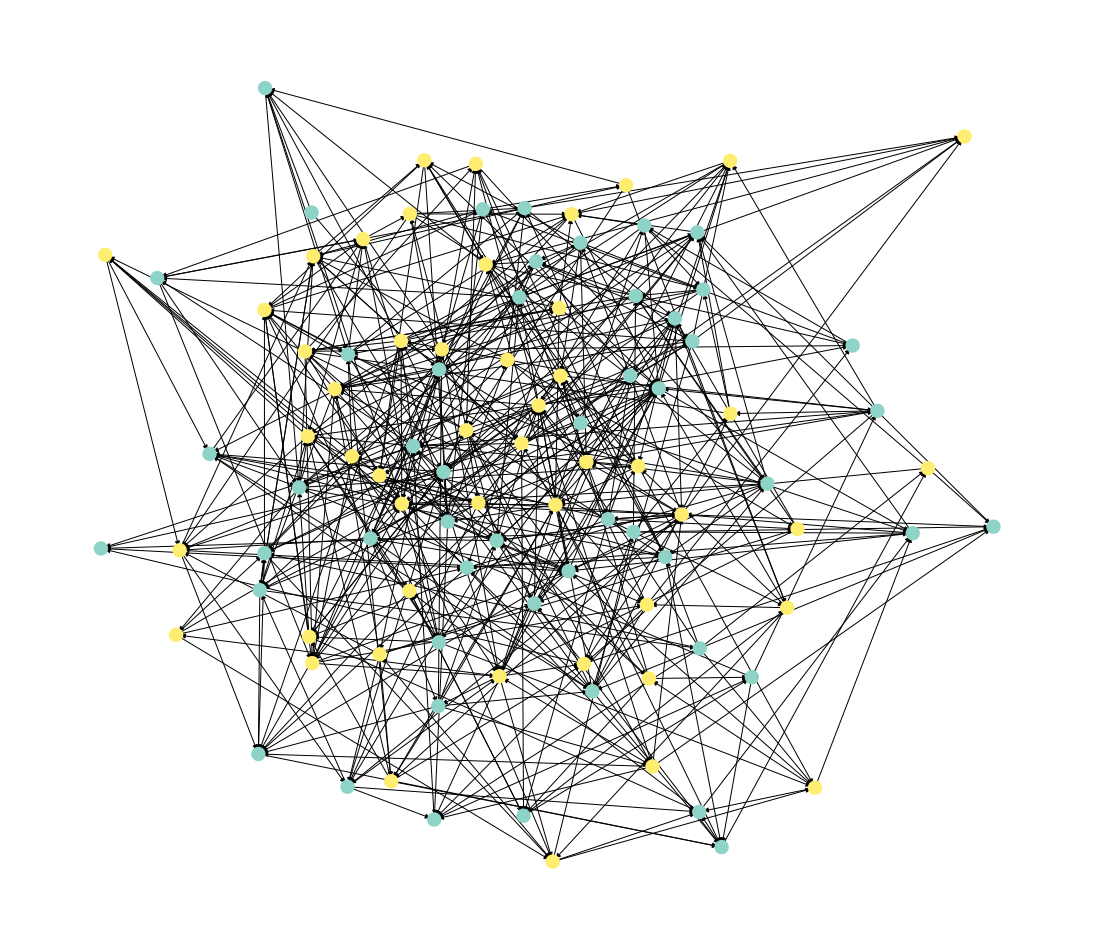

In [83]:
vis = to_networkx(graph)

node_labels = graph.y.numpy()
plt.figure(1, figsize=(15,13))
nx.draw(vis, node_color=node_labels, node_size=70, linewidths=6, 
       cmap=plt.get_cmap('Set3'))

In [46]:
#cluster = data.ClusterData(graph, 5)

In [47]:
#clusterLoader = data.ClusterLoader(cluster)

In [49]:
sampler = data.NeighborSampler(graph.edge_index, sizes=[3,10], batch_size=4, 
                               shuffle=False)

In [53]:
for s in sampler:
    print(s)
    break

(4, tensor([ 0,  1,  2,  3, 98, 22, 34, 86,  4, 12,  5, 51, 79, 14, 40, 91,  7, 41,
        23, 96, 66, 17, 67, 30, 97, 70, 13, 74, 81, 36, 92, 47, 45, 39,  6, 31,
        38, 72, 33, 55, 89, 78, 16, 24, 58, 75, 69, 56, 20, 50]), [EdgeIndex(edge_index=tensor([[ 4,  5,  6,  8, 12, 13, 14,  0,  7,  8,  9, 15, 16, 17,  4,  5, 10, 11,
         18,  0,  1, 19, 20, 21,  0, 22, 23, 24, 25, 26, 27, 27, 27, 12, 28, 29,
          9, 30, 31, 32, 33, 34, 35, 35, 36, 37, 38, 39,  2,  4, 25, 40, 41, 42,
         43, 44, 45, 46, 47, 48, 49],
        [ 0,  0,  0,  0,  0,  0,  0,  1,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
          3,  4,  4,  4,  4,  4,  5,  5,  5,  6,  6,  6,  6,  6,  6,  7,  7,  7,
          8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9, 10, 10, 10, 10, 10, 10,
         10, 10, 11, 11, 11, 11, 11]]), e_id=tensor([292,  74, 354, 352,  62, 415, 484, 367, 420, 350, 311, 126, 467, 440,
         83,  19, 483, 232, 250, 255,  13,  21, 117, 112,  99, 122,   0, 251,
        414,  57, 419, 

In [55]:
print("Batch size : ", s[0])
print("Number of unique nodes involved in sampling", len(s[1]))

Batch size :  4
Number of unique nodes involved in sampling 50


In [68]:
#datasets.__all__

In [69]:
import tqdm as tqdm
import os
import pandas as pd

In [70]:
base_dir = 'data/'
path = os.path.join(base_dir, 'FRANKENSTEIN.node_attrs')
node_attrs = pd.read_csv(path, sep=',', header=None)
node_attrs.index += 1

path = os.path.join(base_dir, 'FRANKENSTEIN.edges')
edge_index = pd.read_csv(path, sep=',', names=['source', 'target'])
edge_index.index += 1

path = os.path.join(base_dir, 'FRANKENSTEIN.graph_idx')
graph_idx = pd.read_csv(path, sep=',', names=['idx'])
graph_idx.index += 1

path = os.path.join(base_dir, 'FRANKENSTEIN.graph_labels')
graph_labels = pd.read_csv(path, sep=',', names=['label'])
graph_labels.index += 1

In [86]:
graph_idx

,idx
1,1
2,1
3,1
4,1
5,1
...,...
73279,4337
73280,4337
73281,4337
73282,4337


In [100]:
g_idx=2345
node_ids = graph_idx.loc[graph_idx['idx']==g_idx].index

attributes = node_attrs.loc[node_ids, :]

edges = edge_index.loc[edge_index['source'].isin(node_ids)]
edges_ids = edges.index

label = graph_labels.loc[g_idx]